In [1]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split

X = np.random.random((80000, 2)) * 2 - 0.5
y = ((np.sin(X[:, 1] * np.pi * X[:,1] * 6) + np.cos(X[:, 0] * np.pi * 2.3)) > 0).astype(int)

# randomly split the data into training, cross validation and test sets
random_state = 42

X_train, X_blind, y_train, y_blind = train_test_split(
    X, y, test_size=0.2, random_state=random_state)

X_test, X_cv, y_test, y_cv = train_test_split(
    X_blind, y_blind, test_size=0.5, random_state=random_state)

print(f'tf.__version__={tf.__version__}')
print(f'X.shape={X.shape}')
print(f'y.shape={y.shape}')
print(f'y max={np.max(y)} y min={np.min(y)}')

tf.__version__=2.16.1
X.shape=(80000, 2)
y.shape=(80000,)
y max=1 y min=0


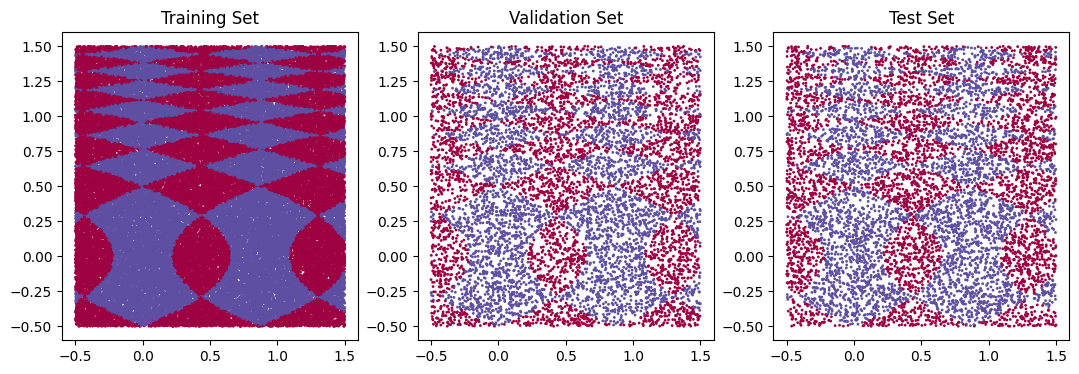

In [2]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=1, cmap=plt.cm.Spectral)
plt.title('Training Set')

plt.subplot(1, 3, 2)
plt.scatter(X_cv[:, 0], X_cv[:, 1], c=y_cv, s=1, cmap=plt.cm.Spectral)
plt.title('Validation Set')

plt.subplot(1, 3, 3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=1, cmap=plt.cm.Spectral)
plt.title('Test Set')

plt.show()


In [3]:
# setup the layers
regfac = 0.0000005
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=l1(regfac)),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=l1(regfac)),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=l1(regfac)),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=l1(regfac)),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=l1(regfac)),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=l1(regfac)),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=l1(regfac)),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=l1(regfac)),
    tf.keras.layers.Dense(2, activation='sigmoid', kernel_regularizer=l1(regfac))
])

epochs = 300
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, verbose=1, validation_data=(X_cv, y_cv))
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)


Epoch 1/300


d:\Projects\Python\ml\house-prices-advanced-regression-techniques\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6461 - loss: 0.5956 - val_accuracy: 0.7830 - val_loss: 0.4706
Epoch 2/300
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7915 - loss: 0.4542 - val_accuracy: 0.7975 - val_loss: 0.4377
Epoch 3/300
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8100 - loss: 0.4111 - val_accuracy: 0.8269 - val_loss: 0.3799
Epoch 4/300
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8241 - loss: 0.3756 - val_accuracy: 0.8275 - val_loss: 0.3790
Epoch 5/300
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8338 - loss: 0.3592 - val_accuracy: 0.8349 - val_loss: 0.3528
Epoch 6/300
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8347 - loss: 0.3473 - val_accuracy: 0.8399 - val_loss: 0.3448
Epoch 7/300
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8391 - loss: 0.3424 - val_accuracy: 0.8444 - val_loss: 0.3300
Epoch 8/300
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8465 - loss: 0.3270 

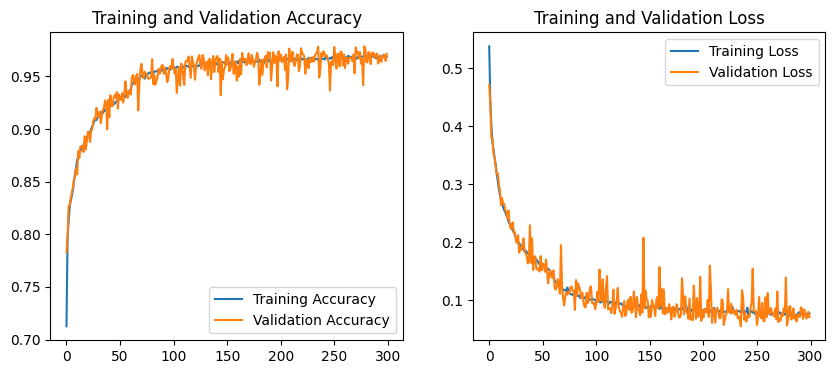

test acc: 97.00% test loss: 0.069


In [4]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print(f'test acc: {test_acc*100:0.2f}% test loss: {test_loss:0.3f}')

  1/704 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step

704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


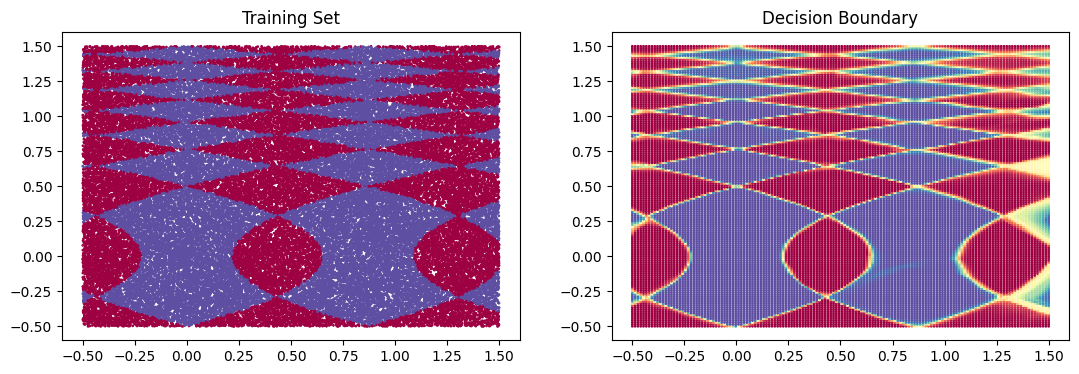

In [7]:
V1 = np.linspace(-0.5, 1.5, 150)
V2 = np.linspace(-0.5, 1.5, 150)
V1, V2 = np.meshgrid(V1, V2)
XT = np.c_[V1.ravel(), V2.ravel()]
Z = model.predict(XT)
YT = np.argmax(Z, axis=1)


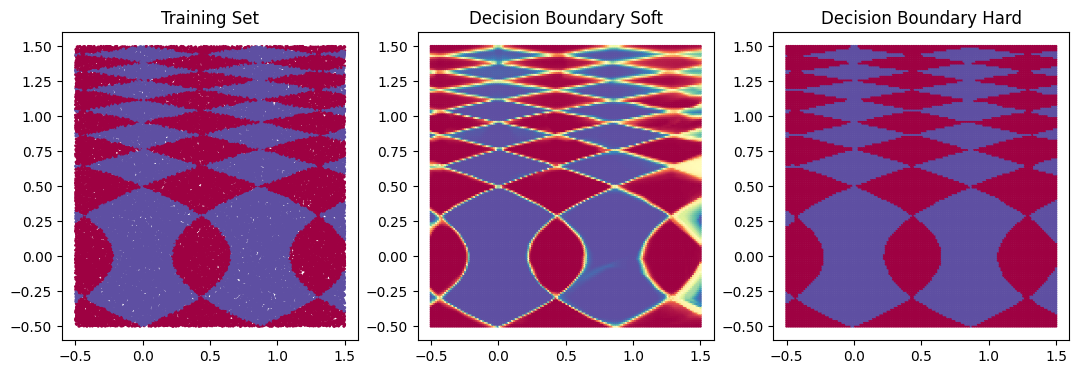

In [8]:

plt.figure(figsize=(13, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=1, cmap=plt.cm.Spectral)
plt.title('Training Set')

plt.subplot(1, 3, 2)
plt.scatter(XT[:, 0], XT[:, 1], c=Z[:, 1], s=1, cmap=plt.cm.Spectral)
plt.title('Decision Boundary Soft')

plt.subplot(1, 3, 3)
plt.scatter(XT[:, 0], XT[:, 1], c=YT, s=1, cmap=plt.cm.Spectral)
plt.title('Decision Boundary Hard')

plt.show()